# DMQC Report: WMO 4901786

## Current status and metadata: 

- DOVA float, inactive as of November 2018
- Completed 100 cycles in mid-North Pacific
- Calculated mean gain of 0.838

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4901786
bgc.io.get_argo(wmo, local_path=bgc.io.Path.ARGO_PATH, overwrite=True)
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA')
print(np.nanmean(gains))

# flt.plot('map') # not built yet

\Users\GordonC\Documents\data\Argo\dac\meds\4901786\4901786_BRtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\4901786_Rtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\4901786_Sprof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\4901786_meta.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\4901786_prof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\4901786_tech.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_000.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_001.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_002.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_003.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_004.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_005.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901786\profiles\BR4901786_006.nc
\Users\GordonC\Documents\data\Argo\dac\med

## DOXY Audit Status

- Almost all points flagged - all raw DOXY values are quite high, mean around 120% saturation
- Mean raw DOXY gain of 0.838

In [3]:
audit_file = list(Path('../../../audit/').glob('DOXY_WOA*'))[-1]
df = pd.read_csv(audit_file, sep='\t', header=25)
df = df.loc[df.WMO == wmo]
df['date'] = [datestr2num(t) for t in df['profile date']]
print(df['WOA G_raw'].mean())

0.837816091954023


## Visual QC

Check the profiles and any anomolous looking saturation values.


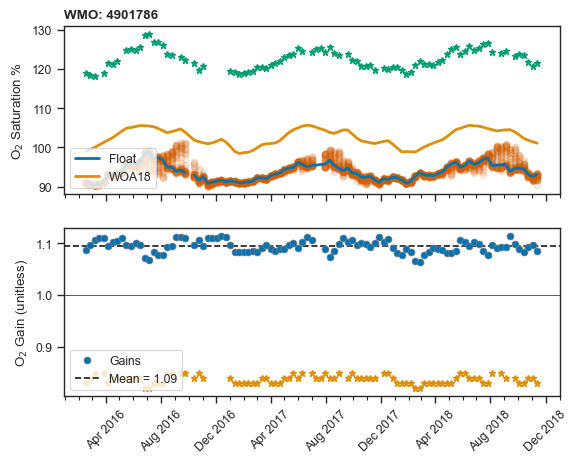

In [4]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)